<a href="https://colab.research.google.com/github/yudhiesh1997/Hands-On-Machine-Learning/blob/master/handsonMLCH6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decison Trees 

Decision Trees are very powerful as they are able to carry out both classification and regression problems with linear and nonlinear data like SVMs

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width 
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

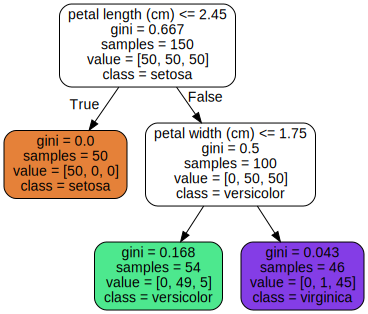

In [6]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))



Decision Trees ask a question at each stage.

The first question is asked at the root node (depth =0) in this case it ask:

 **"Is the petal length <=2.45?"**

 If **True** go to the left node and if **False** go to the right node

 The predicted class is shown in each node. 

 ***One of the best features of a decison tree is the fact that the data does not need to be scaled in order to make an accurate prediction.***




In each node there are 4 parts:

1. **Samples** count how many training instances it applies to i.e., 100 training instances have a petal length greater than 2.45 cm (depth 1, right), and of those 100, 54 have a petal width smaller than 1.75 cm.

2. **Value** tells you how many of these training instances belong to a certain class.

3. **Gini** refers to how impure is the node i.e., a node is defined as being pure if it has a **gini value of 0.** When the gini value = 0 in the node on the left it means that all of them belong to the same class. 

*Gini impurity:*
\begin{equation}
G_{i}=1-\sum_{k=1}^{n} p_{i, k}^{2}
\end{equation}


Scikit-Learn uses the CART algorithm, which produces only *binary trees: nonleaf nodes always have 2 children.*



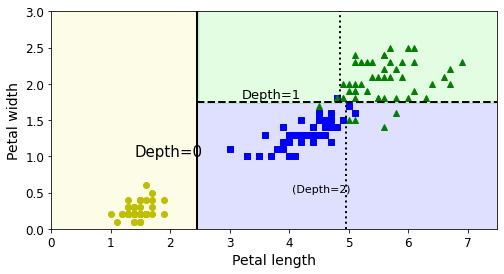

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()


## Decision Tree decision boundaries 

The thick vertical line represents a depth = 0 where the petal length <= 2.45cm.

Since it is pure it cannot be split into anymore.

The righthand area is impure so that is why there are multiple splits. 


 ## Model Interpretation : White Box vs Black Box

 Decision Trees are intuitive and easy to interpret and models like these are referred to as *white box models*. 

 On the other hand models such as Random Forests or neural networks are referred to as *black box models* as it isn't as easy to understand why the model made a particular prediction. 

 For example, if a neural network says that a picture contains a cat it is hard to say what actually made it say so. It could be the fur on their body? It could be the whiskers on their face? It could be the tail? Or even the grass that it is laying on?

## Estimating Class Probabilites 

Decision Trees can estimate the probability that an instance belongs to a certain class *k*.

In [8]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

If we set the petal length = 5 and the petal width = 1.5 then as shown above it would predict that its belongs to class at position 1 or *Iris versicolor*. 


## The CART Training Algorithm 

*Classification and Regression Tree (CART)*

The algorithm works by forst splitting thr training set into two subsets using a single feature *k* and a threshold ${t_k}$. It chooses this value by searching for the pair of ${(k, t_k)}$ that produces the purest subsets.

Once it does it into two it applies the same logic for the newly produced subsets recursively and stops when it reaches the max_depth or if it cannot find a solit that will reduce the impurity. 

$J\left(k, t_{k}\right)=\frac{m_{\mathrm{left}}}{m} G_{\mathrm{left}}+\frac{m_{\mathrm{right}}}{m} G_{\mathrm{right}}$
where $\left\{\begin{array}{l}G_{\text {left/right }} \text { measures the impurity of the left/right subset, } \\ m_{\text {left } / \text { right }} \text { is the number of instances in the left/right subset. }\end{array}\right.$


The CART algorithm is a *greedy algorithm* where it greedily searches for an optimum split at the top level, then repeats the process at each subsequent level. It produces a reasonable solution but not an optimum solution. 

Unfortunately finding the optimal tree is known as a *NP-Complete* problem where it requires exponential time. 

So we shall settle for the "reasonably" good solution. 



## Gini Impurity or Entropy?

By default the Gini impurity is used but you can select the entropy impurity instead by chaning the *criterion* hyperparameter. 

A set's entropy is zero when it contains instances of only one class. 

\begin{equation}
H_{i}=-\sum_{k=1 \atop p_{i, k} \neq 0}^{n} p_{i, k} \log _{2}\left(p_{i, k}\right)
\end{equation}

#### When to use either?

Most of the time they produce similar trees. 

Gini is slightly faster to compute. 

But when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree while entropy tends to produce a slightly more balanced tree.

## Regularization Hyperparameters

Generally to regularize it you can reduce the max_depth. 

Other parameters that restrict the shape of the Decison Tree are:

min_samples_split

min_samples_leaf

min_weight_fraction_leaf

max_leaf_nodes

max_features

Standard statistical tests, such as the χ2 test (chi-squared test), are used to estimate the probability that the improvement is purely the result of chance (which is called the null hypothesis). If this proba‐ bility, called the p-value, is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. The pruning continues until all unnecessary nodes have been pruned.



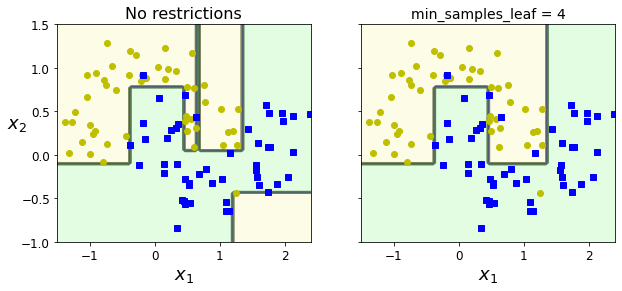

In [9]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

Model on the left is overfitting but when the min_samples_leaf is altered then it is regularized. 



## Regression 

Decison Trees are also capable of performing regression tasks. 



In [13]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

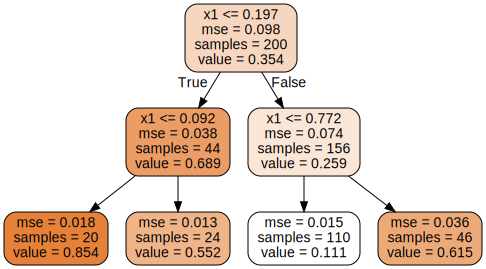

In [17]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

This is the regression tree where it predicts a value at each node.

If ${x_1 = 0.6}$ then you would land on the value 0.111

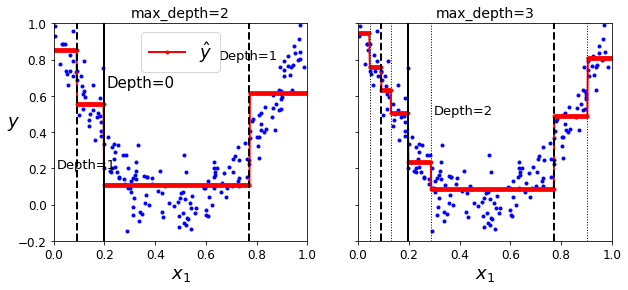

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()


The CART algorithm works in the same way as before except it does not split the data in a way that minimizes the impurity but instead it minimizes the value of the MSE

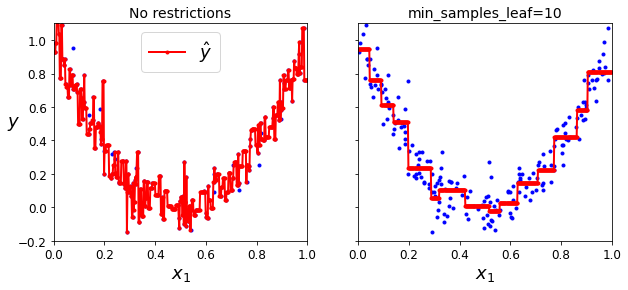

In [18]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

Just like in classification, Decision Trees are prone to overfitting the data and that is why regularizing it is very important. 

The plot on the left shows the Decision Tree with no regularization which clearly overfits the data and the one on  the right where the min_samples_leaf is reduced shows a better fitting graph.

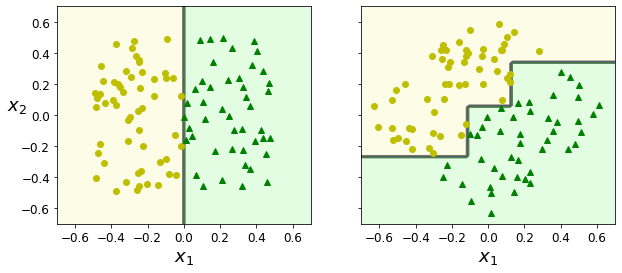

In [19]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()

## Instability 

There are a few limitations when using a Decision Tree.

Decision Trees love orthogonal decision boundaries as shown in the plot above. Both the plots have the same dataset except one is rotated by 45'. The one on the right looks unnecesarilly complex. 
One way to limit this is to use PCA.


In [23]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

array([[4.8, 1.8]])

In [24]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

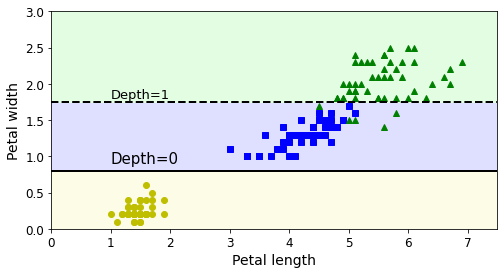

In [25]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

Decision Trees are also very sensitive to small variations in the training data. Fro example, if you just remove the wides *Iris versicolor* from the iris training set, and train a new Decision Tree, you may get a completely different model as shown above. 

Random Forests can limit this instability by averaging predictions over many trees. 

## Exercises

1. What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with one million instances?

  **The depth of a well-balanced binary tree containing m leaves is equal to eaves is equal to log2(m)^2 so for a million it will be approximately 20**

2. Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?

  **A node’s Gini impurity is generally lower than its parent’s. This is due to the CART training algorithm’s cost function, which splits each node in a way that minimizes the weighted sum of its children’s Gini impurities. However, it is possible for a node to have a higher Gini impurity than its parent, as long as this increase is more than compensated for by a decrease in the other child’s impurity.**
3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

  **Yes as this will constrain it.**
4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

  **Decision Trees are not impacted by scaled data so doing so will not reduce underfitting.**


5. If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?

  **It will be about 11.7 hours as the complexity is about O(n × m log(m))**


6. If your training set contains 100,000 instances, will setting presort=True speed up training?

  **Presorting the training set speeds up training only if the dataset is smaller than a few thousand instances but if it. contains 100,000 instances, setting *presort=True* will actully slow down the training.**

## 7. Train and fine-tune a Decision Tree for the moons dataset by following these steps:

a. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.

b. Use train_test_split() to split the dataset into a training set and a test set.

c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

d. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [27]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=10000, noise =0.4, random_state=42)

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV

params = {"max_leaf_nodes": list(np.arange(2,100)), "min_samples_split": [2,3,4], "min_samples_leaf": list(np.arange(1,10))}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=2, cv=3)
grid_search_cv.fit(X_train, y_train)
                            

Fitting 3 folds for each of 2646 candidates, totalling 7938 fits
[CV] max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2 .......
[CV]  max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2 .......
[CV]  max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2 .......
[CV]  max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=3 .......
[CV]  max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=3 .......
[CV]  max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=3 .......
[CV]  max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV]  max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=3 ......
[CV]  max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=3 ......
[CV]  max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=3 ......
[CV]  max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=4 ......
[CV]  max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=4 ......
[CV]  max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=69, min_samples_leaf=2, min_samples_split=4 ......
[CV]  max_leaf_nodes=69, min_samples_leaf=2

[Parallel(n_jobs=1)]: Done 7938 out of 7938 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [33]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=34,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [34]:
from sklearn.metrics import accuracy_score
# By default GridSearchCv trains the best estimator on the model
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.87

## 8. Grow a forest by following these steps:
a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit- Learn’s ShuffleSplit class for this.

b. Train one Decision Tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This approach gives you majority-vote predictions over the test set.

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [36]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [37]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8000735

In [38]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [43]:
from scipy.stats import mode 

y_pred_majority_votes , n_votes = mode(Y_pred, axis=0)

In [44]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.843